In [43]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import  StratifiedShuffleSplit
from sklearn import tree
from joblib import dump, load

from sklearn.metrics import confusion_matrix
import numpy as np

import seaborn as sns

import scipy as sp
from sklearn.ensemble import RandomForestClassifier

In [44]:
FS_0point5=pd.read_csv("FSWithMCAbove0.5.csv")#fS
ticks_0point5=pd.read_csv("TicksWithMCAbove0.5.csv")#tick


In [45]:
n_splits=5

X_np=FS_0point5
y_np=ticks_0point5

a0=0
skfolds = StratifiedShuffleSplit(n_splits)

clf = DecisionTreeClassifier(             
                             ccp_alpha=0.01,
                             min_impurity_decrease=0.01,                      
                            )

for ii in range(5):
    a0=0
    for fold, (train_index, test_index) in enumerate(skfolds.split(X_np, y_np)):

            X_train = X_np.iloc[train_index]
            y_train = y_np.iloc[train_index]
            X_test = X_np.iloc[test_index]
            y_test = y_np.iloc[test_index]
            y_train=y_train.astype(int)
            y_test=y_test.astype(int)
            clf.fit(X_train, y_train) 
            a0=a0+clf.score(X_test,y_test)
    print(' ave  ACC',"{:0.4f}".format(a0/n_splits),'total ACC',"{:0.4f}".format(clf.score(X_np,y_np)))
   
clf.fit(X_np, y_np) 
clf.score(X_np, y_np)

 ave  ACC 0.9277 total ACC 0.9582
 ave  ACC 0.9191 total ACC 0.9635
 ave  ACC 0.9298 total ACC 0.9560
 ave  ACC 0.9596 total ACC 0.9571
 ave  ACC 0.9298 total ACC 0.9571


0.9581545064377682

[Text(0.5833333333333334, 0.9166666666666666, 'TA2 <= 0.608\nsamples = 932\nvalue = [65, 143, 282, 168, 204, 70]\nclass = Class3'),
 Text(0.3, 0.75, 'CR1 <= 0.23\n591\n[15, 141, 8, 153, 204, 70]\nClass5'),
 Text(0.13333333333333333, 0.5833333333333334, 'FH3 <= 92.292\n162\n[15, 138, 7, 1, 1, 0]\nClass2'),
 Text(0.06666666666666667, 0.4166666666666667, '142\n[1, 138, 1, 1, 1, 0]\nClass2'),
 Text(0.2, 0.4166666666666667, '20\n[14, 0, 6, 0, 0, 0]\nClass1'),
 Text(0.4666666666666667, 0.5833333333333334, 'TA2 <= 0.421\n429\n[0, 3, 1, 152, 203, 70]\nClass5'),
 Text(0.3333333333333333, 0.4166666666666667, 'DH5 <= 7.48\n268\n[0, 1, 0, 14, 195, 58]\nClass5'),
 Text(0.26666666666666666, 0.25, 'FH3 <= 60.153\n207\n[0, 1, 0, 14, 190, 2]\nClass5'),
 Text(0.2, 0.08333333333333333, '190\n[0, 1, 0, 0, 188, 1]\nClass5'),
 Text(0.3333333333333333, 0.08333333333333333, '17\n[0, 0, 0, 14, 2, 1]\nClass4'),
 Text(0.4, 0.25, '61\n[0, 0, 0, 0, 5, 56]\nClass6'),
 Text(0.6, 0.4166666666666667, 'MA2 <= 2.2\n161\

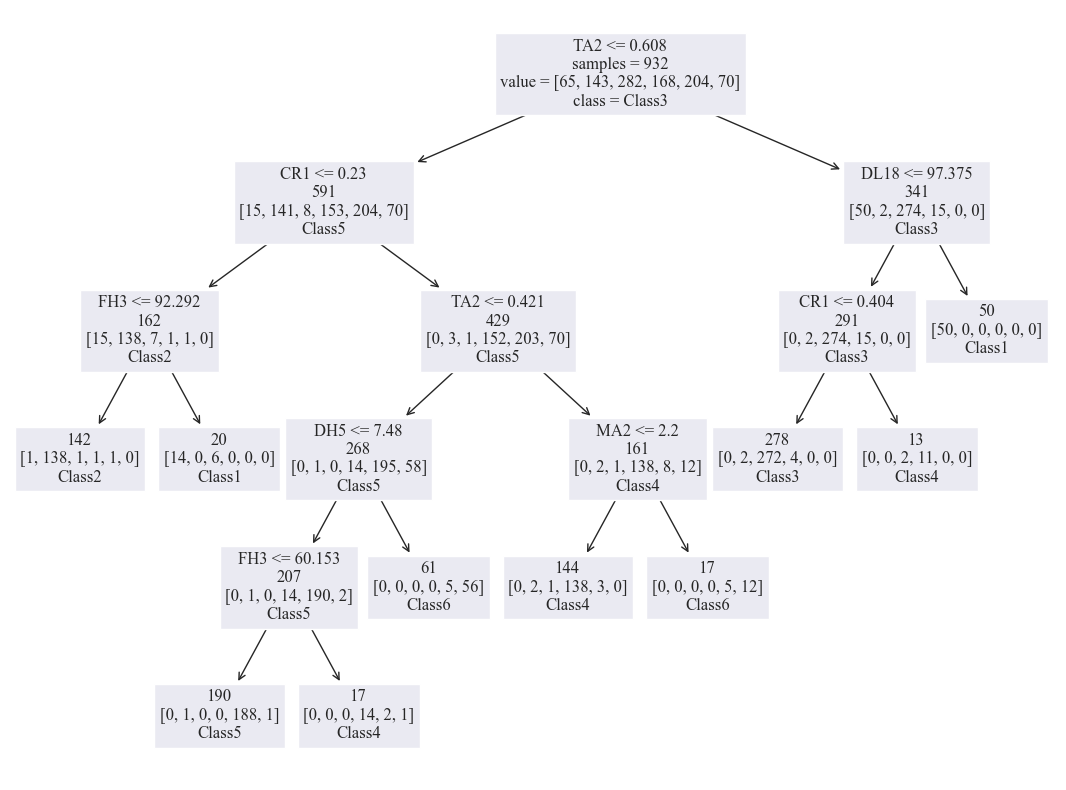

In [46]:
%matplotlib inline
clf.fit(X_np, y_np) 
clf.score(X_np, y_np)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['figure.figsize']=(13.5/1,10/1)
# plt.rcParams['figure.dpi'] = 100
tree.plot_tree(clf,fontsize =12,
               class_names=['Class1','Class2','Class3','Class4','Class5','Class6'],
               impurity=False,       
               label='root',
               feature_names=X_np.columns)

what basin attributes affect classification

In [47]:
BS2Tick=pd.read_csv("MCAbovePoint5_BS2Tick.csv")
tick=BS2Tick.Class
BS=BS2Tick.iloc[:,1:-1]

In [48]:
n_splits=5

X_np=BS

y_np=tick
a0=0
skfolds = StratifiedShuffleSplit(n_splits)




n_splits=5


skfolds = StratifiedShuffleSplit(n_splits)
for ii in range(5):
    a0=0
    rf =  RandomForestClassifier(n_estimators=50,max_depth=20 )   

    for fold, (train_index, test_index) in enumerate(skfolds.split(X_np, y_np)):

            X_train = X_np.iloc[train_index]
            y_train = y_np.iloc[train_index]
            X_test = X_np.iloc[test_index]
            y_test = y_np.iloc[test_index]
            y_train=y_train.astype(int)
            y_test=y_test.astype(int)
            rf.fit(X_train, y_train) 
            
            a0=a0+rf.score(X_test,y_test)

    print(' ave  ACC',"{:0.4f}".format(a0/n_splits),'total ACC',"{:0.4f}".format(rf.score(X_np,y_np)))



 ave  ACC 0.8064 total ACC 0.9807
 ave  ACC 0.8298 total ACC 0.9861
 ave  ACC 0.8574 total ACC 0.9785
 ave  ACC 0.8340 total ACC 0.9807
 ave  ACC 0.8298 total ACC 0.9871


In [49]:
rf.score(X_np,y_np)

0.9871244635193133

In [50]:
cm=confusion_matrix(y_np, rf.predict(X_np) )
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

precision = TP / (TP+FP)  
recall = TP / (TP+FN)  
print(precision,recall)

[0.96969697 0.98591549 0.97887324 0.98802395 1.         1.        ] [0.98461538 0.97902098 0.9858156  0.98214286 0.99509804 1.        ]


In [51]:
BS2Tick=pd.read_csv("MCAbovePoint5_BS2Tick.csv")
tick=BS2Tick.Class
BS=BS2Tick.iloc[:,1:-1]
X=BS
y=tick


In [ ]:

j=0
 

print('---BEGIN')
for ii in range(100):
    rf.fit(X,y)
    feature_imp = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)

    if j==0:
        feature_imp2=pd.DataFrame(feature_imp[0:40].index)
        feature_imp3=pd.DataFrame(feature_imp[0:40].values)
    feature_imp2[j]=feature_imp[0:40].index
    feature_imp3[j]=feature_imp[0:40].values
    j=j+1
print('---DONE')

for i in range(40):

    a0=feature_imp2.T.groupby([i]).size()
    b0=pd.DataFrame(data=a0.values.reshape(1,a0.values.shape[0]),columns=a0.index,index=[i+1])
    if i==0:
        c=b0
    else:
        c=pd.concat([b0, c])

c=c.iloc[::-1]
c=c.fillna(0)

j=0

for i in c.columns:    

    j=j+1

e=np.zeros(j)

for i in range(j):
    e[i]=np.nanmean(feature_imp3[feature_imp2==c.columns[i]])
c.loc['Importance']=e
c=c.sort_values(axis=1,by='Importance',ascending=False)
d=pd.DataFrame(data=[c.loc['Importance'][0:10].values,c.loc['Importance'][0:10].index.tolist()])

---BEGIN
---DONE


In [53]:
c

,p_mean,low_prec_freq,aridity,low_prec_dur,high_prec_dur,seasonality,moisture_index,ele_mt_smn,high_prec_freq,ele_mt_sav,...,glc_pc_s09,glc_pc_s15,glc_pc_s19,glc_pc_s18,glc_pc_s03,glc_pc_s17,glc_pc_s10,glc_pc_s08,glc_pc_s05,glc_pc_s07
1,100.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.000000,70.000000,27.000000,3.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,0.000000,23.000000,59.000000,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,0.000000,6.000000,12.000000,65.00000,10.000000,3.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5,0.000000,1.000000,1.000000,12.00000,28.000000,34.000000,20.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
6,0.000000,0.000000,0.000000,2.00000,33.000000,24.000000,24.000000,17.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
7,0.000000,0.000000,1.000000,1.00000,12.000000,22.000000,35.000000,28.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
8,0.000000,0.000000,0.000000,0.00000,16.000000,16.000000,16.000000,47.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
9,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,3.000000,45.000000,38.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
10,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,33.000000,34.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [54]:
d

,0,1,2,3,4,5,6,7,8,9
0,0.113254,0.068246,0.063973,0.05646,0.048051,0.047268,0.046555,0.043961,0.036059,0.035666
1,p_mean,low_prec_freq,aridity,low_prec_dur,high_prec_dur,seasonality,moisture_index,ele_mt_smn,high_prec_freq,ele_mt_sav
